<a href="https://colab.research.google.com/github/Sameekshaurs/ML_lab/blob/main/MLlab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Number of samples
n_samples = 5000

# Simulate features using random but realistic ranges
np.random.seed(42)
data = {
    'voltage': np.random.normal(loc=220, scale=10, size=n_samples),       # Normal voltage ~220V
    'current': np.random.normal(loc=5, scale=2, size=n_samples),          # Current ~5A
    'resistance': np.random.normal(loc=10, scale=2, size=n_samples),      # Ohms
    'temperature': np.random.normal(loc=35, scale=5, size=n_samples),     # Celsius
    'vibration': np.random.normal(loc=0.5, scale=0.2, size=n_samples),    # Arbitrary vibration level
    'humidity': np.random.uniform(low=30, high=90, size=n_samples),       # %
    'frequency': np.random.normal(loc=50, scale=1, size=n_samples),       # Hz
    'power_factor': np.random.uniform(0.7, 1.0, size=n_samples),          # cos(φ)
    'wire_age': np.random.randint(1, 20, size=n_samples),                 # years
    'load': np.random.uniform(30, 100, size=n_samples)                    # % of max capacity
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Simulate target: make it depend a bit on some risky features
# Higher chance of fault if high temperature, high load, high current, old wire
df['fault'] = ((df['temperature'] > 40) &
               (df['load'] > 80) &
               (df['current'] > 6) &
               (df['wire_age'] > 10)).astype(int)

# Save to CSV
df.to_csv("synthetic_fault_detection.csv", index=False)



In [4]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('fault', axis=1)  # All columns except the label
y = df['fault']               # The label column

# Split the dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show the shape of each set
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (4000, 10)
Testing set: (1000, 10)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.996


In [8]:
from sklearn.model_selection import train_test_split

# Step 1: Split into Train+Validation (80%) and Test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Split Train+Validation into Train (60%) and Validation (20%)
# 0.25 x 0.8 = 0.2 → 25% of 80% becomes 20% of the total
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

# Shapes
print("Train Set:", X_train.shape)
print("Validation Set:", X_val.shape)
print("Test Set:", X_test.shape)


Train Set: (3000, 10)
Validation Set: (1000, 10)
Test Set: (1000, 10)


In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [12]:
from sklearn.metrics import accuracy_score

# Predict on validation set
y_val_pred = model.predict(X_val)

# Accuracy
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))


Validation Accuracy: 0.993


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


[[992   2]
 [  5   1]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       994
           1       0.33      0.17      0.22         6

    accuracy                           0.99      1000
   macro avg       0.66      0.58      0.61      1000
weighted avg       0.99      0.99      0.99      1000



In [21]:
# Try a different regularization strength
model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)

# Check validation performance again
y_val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))


Validation Accuracy: 0.993


In [23]:
# Final evaluation on test data
y_test_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.997
[[993   0]
 [  3   4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      0.57      0.73         7

    accuracy                           1.00      1000
   macro avg       1.00      0.79      0.86      1000
weighted avg       1.00      1.00      1.00      1000



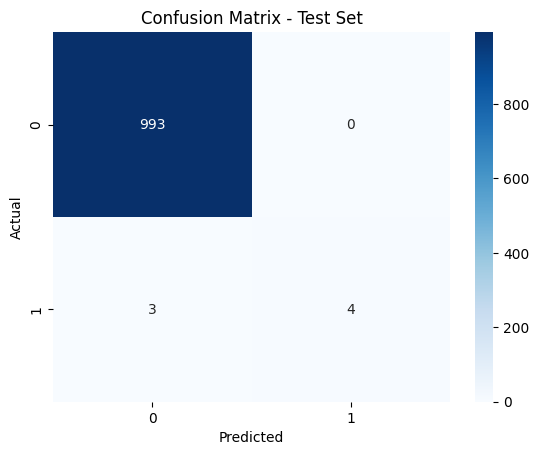

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()


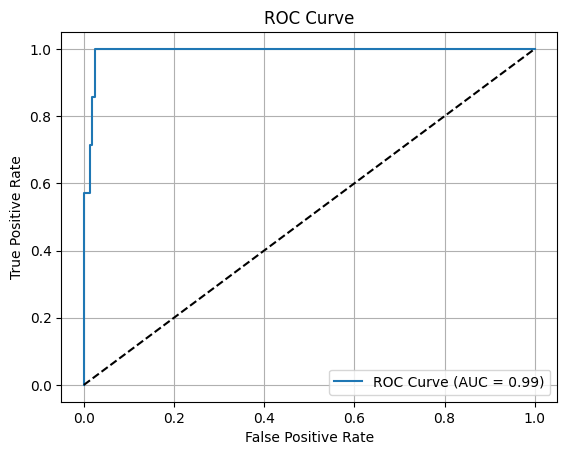

In [27]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
# Print feature importance (coefficients)
coefficients = model.coef_[0]
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")


voltage: -0.0583
current: 0.8777
resistance: -0.2474
temperature: 0.4533
vibration: -0.1782
humidity: 0.0052
frequency: -0.5947
power_factor: -0.1627
wire_age: 0.2855
load: 0.1542


In [31]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Prepare data (features and target)
X = df.drop('fault', axis=1).values
y = df['fault'].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")

    # Split data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Initialize and train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {acc:.4f}")
    accuracies.append(acc)

print(f"\nAverage K-Fold Accuracy: {np.mean(accuracies):.4f}")


Fold 1
Accuracy: 0.9960
Fold 2
Accuracy: 0.9990
Fold 3
Accuracy: 0.9930
Fold 4
Accuracy: 0.9950
Fold 5
Accuracy: 0.9930

Average K-Fold Accuracy: 0.9952



--- Fold 1 ---
Accuracy: 0.9960
Confusion Matrix:
[[992   1]
 [  3   4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       0.80      0.57      0.67         7

    accuracy                           1.00      1000
   macro avg       0.90      0.79      0.83      1000
weighted avg       1.00      1.00      1.00      1000



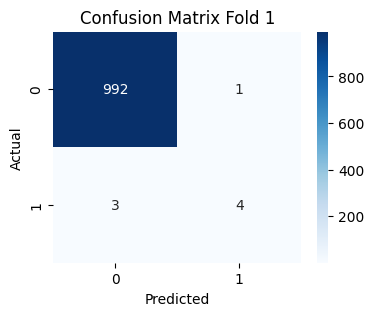


--- Fold 2 ---
Accuracy: 0.9990
Confusion Matrix:
[[997   1]
 [  0   2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       998
           1       0.67      1.00      0.80         2

    accuracy                           1.00      1000
   macro avg       0.83      1.00      0.90      1000
weighted avg       1.00      1.00      1.00      1000



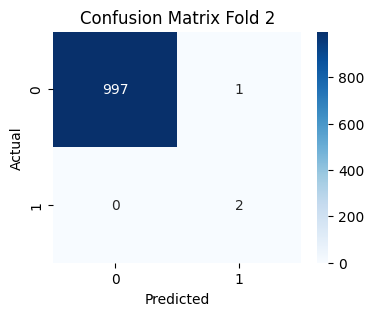


--- Fold 3 ---
Accuracy: 0.9930
Confusion Matrix:
[[990   0]
 [  7   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       990
           1       1.00      0.30      0.46        10

    accuracy                           0.99      1000
   macro avg       1.00      0.65      0.73      1000
weighted avg       0.99      0.99      0.99      1000



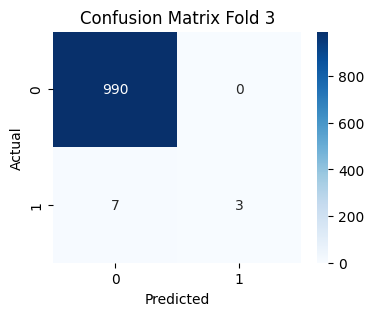


--- Fold 4 ---
Accuracy: 0.9950
Confusion Matrix:
[[995   1]
 [  4   0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       996
           1       0.00      0.00      0.00         4

    accuracy                           0.99      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.99      0.99      0.99      1000



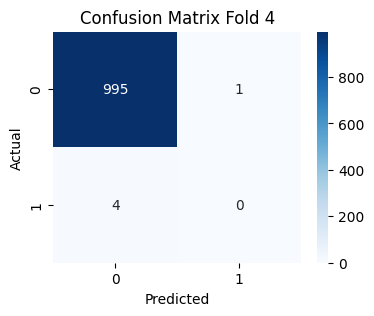


--- Fold 5 ---
Accuracy: 0.9930
Confusion Matrix:
[[992   1]
 [  6   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       993
           1       0.50      0.14      0.22         7

    accuracy                           0.99      1000
   macro avg       0.75      0.57      0.61      1000
weighted avg       0.99      0.99      0.99      1000



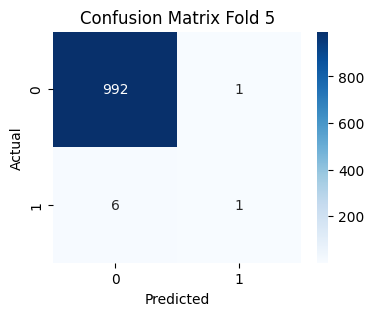


Average Accuracy over 5 folds: 0.9952

Summary Classification Reports per Fold:
                                                      0  \
fold                                                      
1     {'precision': 0.9969849246231156, 'recall': 0....   
2     {'precision': 1.0, 'recall': 0.998997995991984...   
3     {'precision': 0.9929789368104313, 'recall': 1....   
4     {'precision': 0.995995995995996, 'recall': 0.9...   
5     {'precision': 0.9939879759519038, 'recall': 0....   

                                                      1  accuracy  \
fold                                                                
1     {'precision': 0.8, 'recall': 0.571428571428571...     0.996   
2     {'precision': 0.6666666666666666, 'recall': 1....     0.999   
3     {'precision': 1.0, 'recall': 0.3, 'f1-score': ...     0.993   
4     {'precision': 0.0, 'recall': 0.0, 'f1-score': ...     0.995   
5     {'precision': 0.5, 'recall': 0.142857142857142...     0.993   

                     

/tmp/ipython-input-588423391.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, kf.get_n_splits()+1)), y=accuracies, palette='viridis')


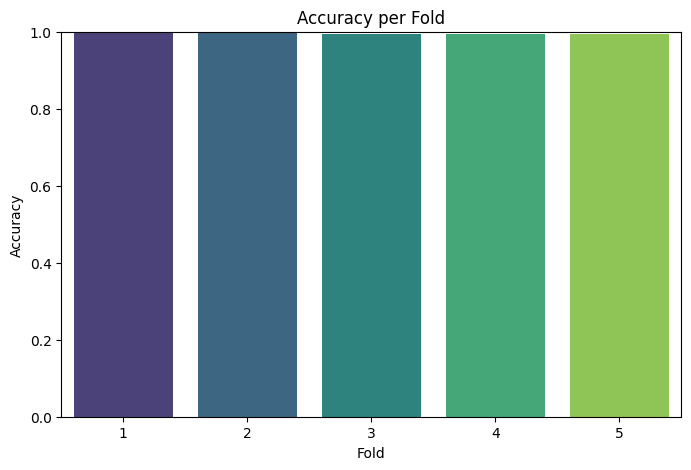

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare data
X = df.drop('fault', axis=1).values
y = df['fault'].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
fold_reports = []

for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)

    print(f"Accuracy: {acc:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification report
    cr = classification_report(y_val, y_pred, output_dict=True)
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    # Save report with fold info
    cr['fold'] = fold
    fold_reports.append(cr)

    # Optional: plot confusion matrix heatmap per fold
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Summary results
print(f"\nAverage Accuracy over {kf.get_n_splits()} folds: {np.mean(accuracies):.4f}")

# Create a DataFrame for classification reports
df_reports = pd.DataFrame(fold_reports).set_index('fold')
print("\nSummary Classification Reports per Fold:")
print(df_reports)

# Plot accuracies per fold
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1, kf.get_n_splits()+1)), y=accuracies, palette='viridis')
plt.title('Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming df is your dataset with features and 'fault' as target
X = df.drop('fault', axis=1)
y = df['fault']

# Step 1: Split into train and test (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Initialize Logistic Regression
model = LogisticRegression(max_iter=1000)

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = model.predict(X_test)

# Step 5: Evaluate performance
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on test set: 0.996

Confusion Matrix:
 [[992   1]
 [  3   4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       0.80      0.57      0.67         7

    accuracy                           1.00      1000
   macro avg       0.90      0.79      0.83      1000
weighted avg       1.00      1.00      1.00      1000



In [37]:
print("\nFeature coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")



Feature coefficients:
voltage: -0.0500
current: 0.9588
resistance: -0.1918
temperature: 0.4954
vibration: -0.0056
humidity: -0.0040
frequency: -0.6576
power_factor: -0.0302
wire_age: 0.2859
load: 0.1399


In [39]:
import numpy as np

# Example new data (replace with real sensor input)
new_data = {
    'voltage': 210,
    'current': 7,
    'resistance': 12,
    'temperature': 45,
    'vibration': 0.7,
    'humidity': 65,
    'frequency': 50,
    'power_factor': 0.85,
    'wire_age': 12,
    'load': 90
}

# Convert to DataFrame (1 row)
import pandas as pd
new_df = pd.DataFrame([new_data])

# Predict using trained model
prediction = model.predict(new_df)[0]

if prediction == 1:
    print("⚠️ Fault detected! Immediate attention required.")
else:
    print("✅ System normal, no fault detected.")


✅ System normal, no fault detected.


In [41]:
new_data_faulty = {
    'voltage': 150,      # Low voltage could be a fault
    'current': 15,       # Higher current indicating possible short circuit
    'resistance': 2,     # Very low resistance might mean a fault
    'temperature': 85,   # High temperature—warning sign
    'vibration': 2.0,    # High vibration—could indicate issue
    'humidity': 90,      # High humidity can cause faults
    'frequency': 48,     # Slight frequency drop
    'power_factor': 0.4, # Low power factor—inefficient and possible fault
    'wire_age': 20,      # Old wire could be prone to fault
    'load': 120          # Overload condition
}

new_df_faulty = pd.DataFrame([new_data_faulty])
prediction_faulty = model.predict(new_df_faulty)[0]

if prediction_faulty == 1:
    print("⚠️ Fault detected! Immediate attention required at this sensor.")
else:
    print("✅ System normal, no fault detected.")


⚠️ Fault detected! Immediate attention required at this sensor.


In [42]:
import pandas as pd

# This function takes a dictionary of sensor values, predicts fault, and prints alert
def detect_fault(sensor_data, model):
    # Convert input dict to DataFrame (1 sample)
    input_df = pd.DataFrame([sensor_data])

    # Predict fault (0 = no fault, 1 = fault)
    prediction = model.predict(input_df)[0]

    if prediction == 1:
        print("⚠️ Fault detected! Immediate attention required at this sensor.")
    else:
        print("✅ System normal, no fault detected.")

# Example usage:
if __name__ == "__main__":
    # Example sensor input (modify with real-time data as needed)
    sensor_input_1 = {
        'voltage': 210,
        'current': 7,
        'resistance': 12,
        'temperature': 45,
        'vibration': 0.7,
        'humidity': 65,
        'frequency': 50,
        'power_factor': 0.85,
        'wire_age': 12,
        'load': 90
    }

    sensor_input_2 = {
        'voltage': 150,
        'current': 15,
        'resistance': 2,
        'temperature': 85,
        'vibration': 2.0,
        'humidity': 90,
        'frequency': 48,
        'power_factor': 0.4,
        'wire_age': 20,
        'load': 120
    }

    print("Checking sensor input 1:")
    detect_fault(sensor_input_1, model)

    print("\nChecking sensor input 2:")
    detect_fault(sensor_input_2, model)


Checking sensor input 1:
✅ System normal, no fault detected.

Checking sensor input 2:
⚠️ Fault detected! Immediate attention required at this sensor.
